# Getting Started

## Read CSV and Import


In [7]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')




## Helper Functions

In [8]:
def create_X_y(df):

  value_map = {
    'yes': 1,
    'no': 0
  }
  df['y_encoded'] = df['y'].map(value_map)

  X = df[['default', 'job', 'loan', 'housing', 'education', 'campaign', 'day_of_week', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
  y = df['y_encoded'].astype(bool)



  X = pd.get_dummies(X, columns=['default', 'job', 'loan', 'housing', 'education', 'day_of_week'])
  return X,y

# Model Training

## Data Prep for specific model

In [9]:
X,y = create_X_y(campaign)

### Split the data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# commented out print statments to remove clutter.  These just show info about the split
# print(X_train.head())
# print(X.info())
# print(y_train.head())

## Train the Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# change between Neighbors and D. Tree
#clf = KNeighborsClassifier(n_neighbors=3)

## So far, the D Tree with no max limits has gotten the best score at f1 = .16 recall at .13
clf = DecisionTreeClassifier(max_depth=5)


clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

## Make predictions

In [12]:
predictions = clf.predict(X_test)
print(predictions)

[False False False ... False False False]


## Results

### Results data

In [13]:
# code obtained from google to quickly get count of each value from np array
import numpy as np

unique_values, counts = np.unique(predictions, return_counts=True)

value_counts = dict(zip(unique_values, counts))

print("Predictions value counts")
print(value_counts)
print("------------")
print("Should be:")
print(y_test.value_counts())


Predictions value counts
{np.False_: np.int64(10391), np.True_: np.int64(730)}
------------
Should be:
y_encoded
False    9891
True     1230
Name: count, dtype: int64


### Metrics

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision: ",precision_score(y_test, predictions))
print("Recall", recall_score(y_test, predictions))
print("F1", f1_score(y_test, predictions))

Accuracy: 0.8888589155651471
Precision:  0.4958904109589041
Recall 0.2943089430894309
F1 0.3693877551020408


<Axes: >

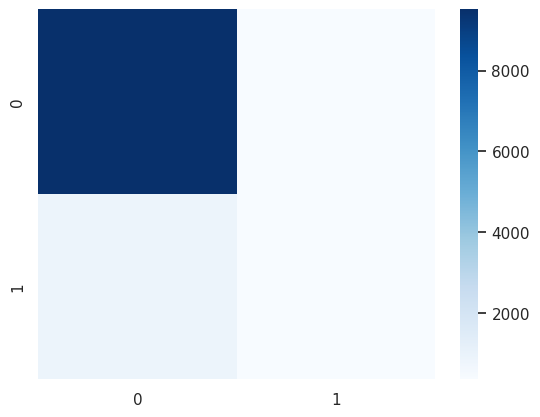

In [15]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, cmap="Blues")

## Other Misc from model

[Text(0.49375, 0.9166666666666666, 'x[5] <= 5087.65\ngini = 0.203\nsamples = 25948\nvalue = [22970, 2978]'),
 Text(0.25416666666666665, 0.75, 'x[5] <= 5049.85\ngini = 0.495\nsamples = 3147\nvalue = [1730, 1417]'),
 Text(0.37395833333333334, 0.8333333333333333, 'True  '),
 Text(0.13333333333333333, 0.5833333333333334, 'x[36] <= 0.5\ngini = 0.5\nsamples = 2091\nvalue = [1029, 1062]'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[0] <= 3.5\ngini = 0.497\nsamples = 1641\nvalue = [754, 887]'),
 Text(0.03333333333333333, 0.25, 'x[4] <= 0.698\ngini = 0.494\nsamples = 1515\nvalue = [676, 839]'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.454\nsamples = 273\nvalue = [95, 178]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.498\nsamples = 1242\nvalue = [581, 661]'),
 Text(0.1, 0.25, 'x[30] <= 0.5\ngini = 0.472\nsamples = 126\nvalue = [78, 48]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.494\nsamples = 101\nvalue = [56.0, 45.0]'),
 Text(0.11666666666666667, 0.08

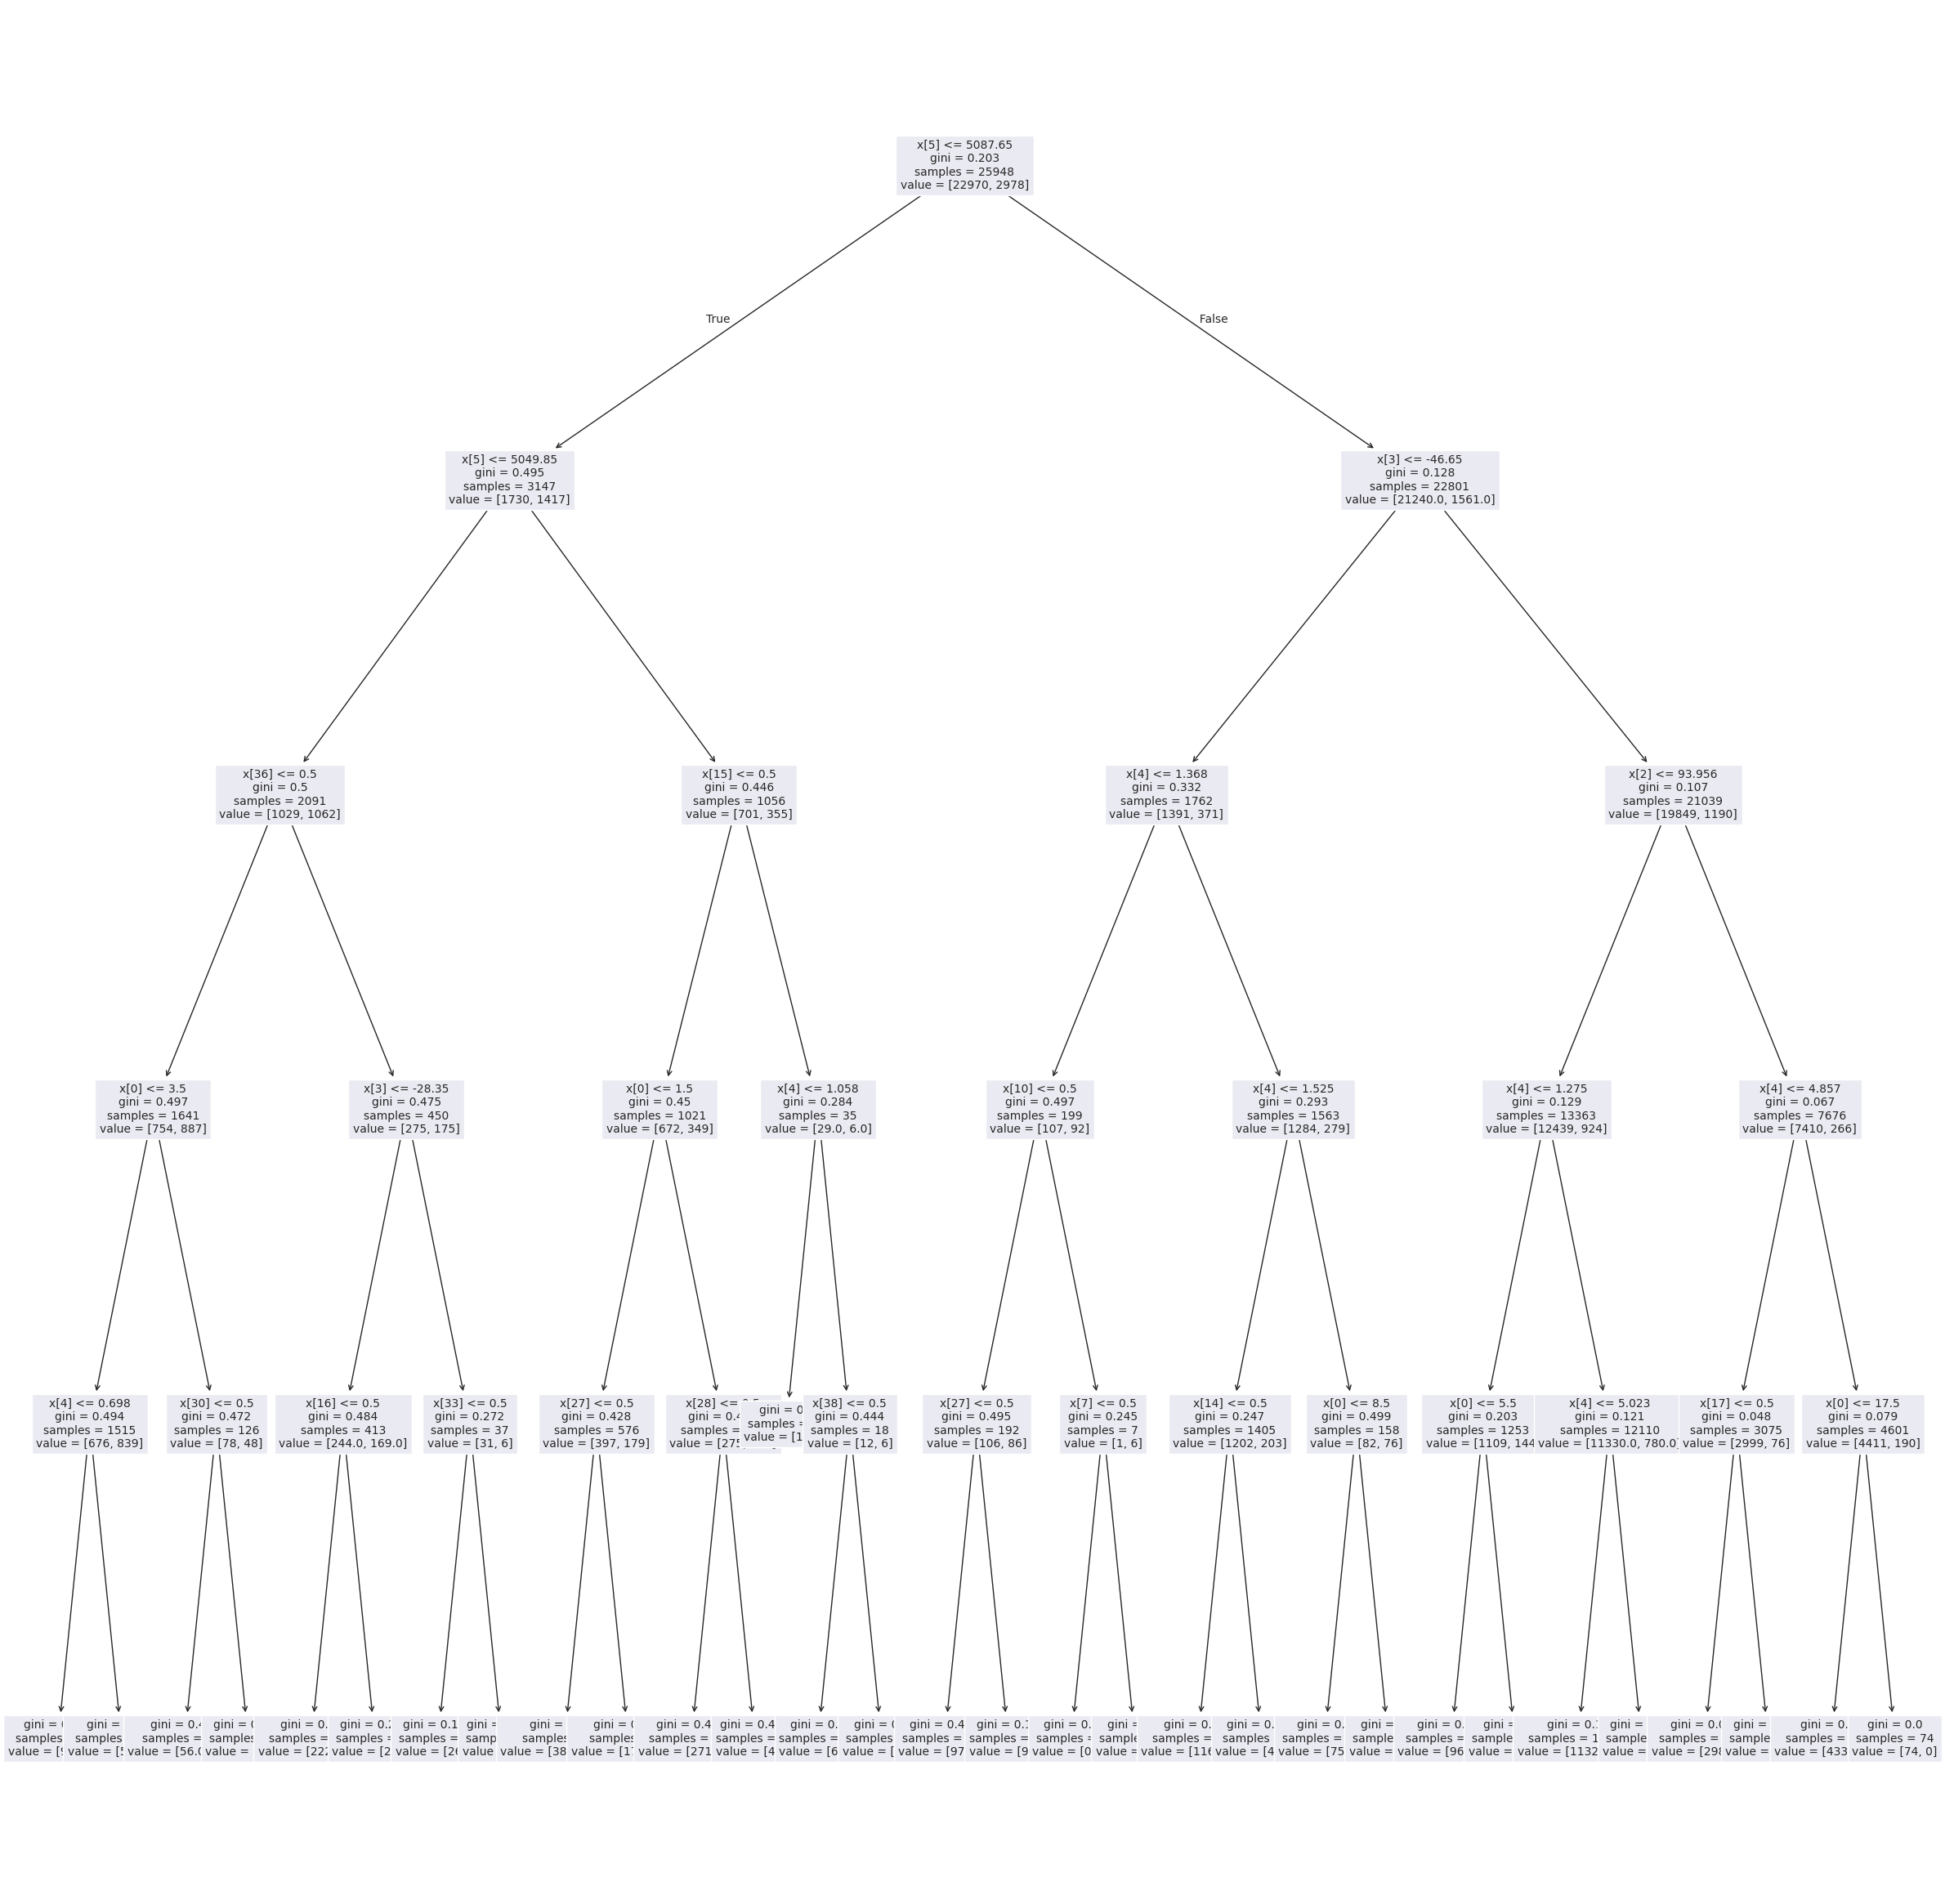

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(clf, fontsize=10)

In [17]:
# ## holdout data
# holdout_data = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")
# holdout_X = holdout_data[['age', 'marital', 'job', 'loan', 'housing', 'education', 'campaign']]
# # holdout_X['default_yes'] = False
# holdout_X = pd.get_dummies(holdout_X, columns=['job', 'loan', 'housing', 'education', 'marital'])
# holdout_X.info()

# holdout_prediction = clf.predict(holdout_X)

# print(holdout_prediction.shape)

